# <font color='darkgreen'>MODELAGEM DE SÉRIES TEMPORAIS - PARTE I</font>
## <font color='darkgreen'>SÉRIE TEMPORAL DA COTAÇÃO DO OURO</font>

Este projeto tem como objetivo a modelagem de uma série temporal univariada para prever a cotação futura do ouro. O conjunto de dados abrange os preços históricos do ouro no período de 1970 a 2020.

fonte: https://www.kaggle.com/datasets/arashnic/learn-time-series-forecasting-from-gold-price

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('A verão python utilizada neste jupyter notebook:', python_version())

A verão python utilizada neste jupyter notebook: 3.11.5


## Instalar e Carregar Pacotes

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Gravar versões de pacotes
# !pip install -q -U watermark

In [4]:
# Versões dos pacotes
%reload_ext watermark
%watermark --iversions

pandas     : 2.0.3
platform   : 1.0.8
seaborn    : 0.12.2
matplotlib : 3.7.2
statsmodels: 0.14.0
numpy      : 1.24.3



## Carregar Dados

In [5]:
# Criar uma lista para identificar valores ausentes
rotulos_valores_ausentes = ["na", "undefined"]

In [6]:
# Carregar dataset
df_origin = pd.read_csv("dataset.csv", na_values = rotulos_valores_ausentes)

In [7]:
# Cópia dataset original
df = df_origin.copy()

In [8]:
df.shape

(10787, 2)

In [9]:
# Checando os nomes das variáveis
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [10]:
# Variáveis
df.columns

Index(['Date', 'Value'], dtype='object')

In [11]:
dict_dados = {
    'Date': 'Data da cotação',
    'Value' : 'Preço em dólar (US$) de uma onça troy (31,1035 gramas) de ouro'
}

**Ação:**
Criação de um dicionário de dados.

**Justificativa:**
Facilitar a consulta das características dos dados no decorrer do processo de análise.

In [12]:
dict_dados['Value']

'Preço em dólar (US$) de uma onça troy (31,1035 gramas) de ouro'

In [13]:
# define a configuração para exibir até 100 colunas ao imprimir um DataFrame.
pd.set_option('display.max_columns', 100)

## Análise Exploratória

In [14]:
# Shape
df.shape

(10787, 2)

In [15]:
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [16]:
# Amostra aleatória dos dados
df.sample(5)

,Date,Value
4158,1994-10-18,389.75
2210,1987-04-30,453.25
3961,1994-01-14,390.10
9514,2015-04-29,1209.00
9042,2013-07-08,1235.25


In [17]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


A frente vamos ajustar a variável Date de object para datetime.

In [18]:
# Período da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(df.Date.min(), df.Date.max()))

Início do Período de Tempo: 1970-01-01
Final do Período de Tempo: 2020-03-13


In [19]:
# Estatística descritiva
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


**Análise & Insights (count):** Valor de 10787.0 semelhante ao valor do shape, o que sugere a ausência de valores não nulos na variável 'Value'. Count indica quantas entradas válidas existem para cada variável, excluindo os valores ausentes (como NaN).

## Processar Dados

In [20]:
# Tipos dos Dados
df.dtypes

Date      object
Value    float64
dtype: object

In [21]:
# Verificar valores nulos antes da conversão
print(df.isnull().sum())

Date     0
Value    0
dtype: int64


In [22]:
# Convertendo a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [23]:
# Verificar valores nulos após a conversão
print(df.isnull().sum())

Date     0
Value    0
dtype: int64


In [24]:
# Tipos dos Dados
df.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [25]:
# Visualizando os Dados
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [26]:
# Transformar a variável datesold como índice 
df_serie = df.set_index('Date')

In [27]:
df_serie.head()

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


Agora o dataset está caracterizado como uma série temporal.

In [28]:
# Verificar o índice
df_serie.index

DatetimeIndex(['1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01', '1971-04-01', '1971-07-01', '1971-10-01',
               '1972-01-03', '1972-04-03',
               ...
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13'],
              dtype='datetime64[ns]', name='Date', length=10787, freq=None)

## Visualizar Dados

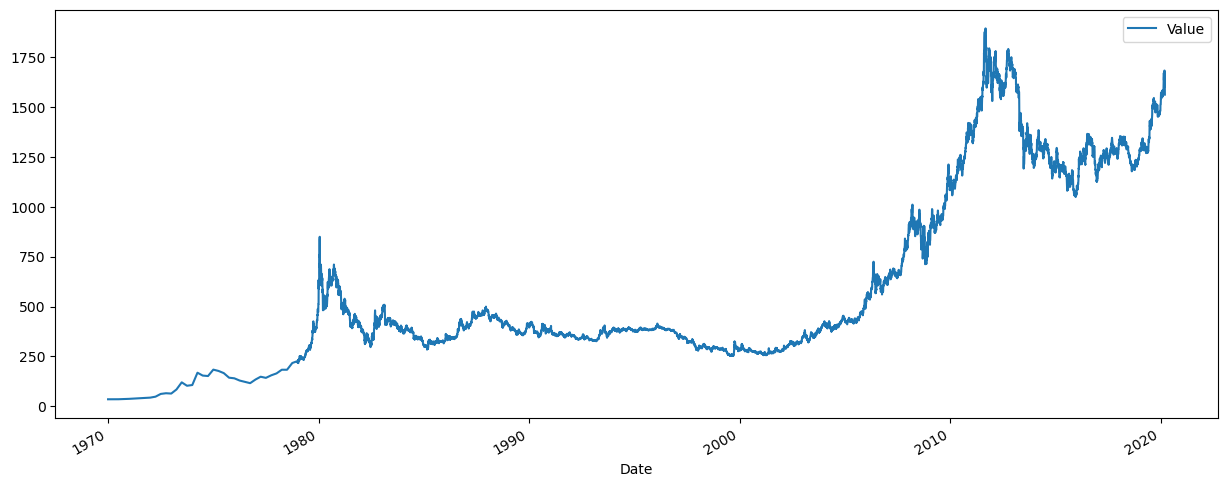

In [29]:
# Plot da Série Temporal
df_serie.plot(figsize = (15, 6))
plt.show()

**Análise & Insigths:**
- Sazonalidade: A partir de 2008 percebemos um aumento na amplitude da sazonalidade.
- Tendência: ao longo do tempo, a série segue uma tendência de crescimento.
- Efeito cíclico vs. sazonal: Se os padrões não seguem uma frequência fixa com base no calendário, são classificados como cíclicos que são influenciados por fatores externos, como condições econômicas ou mudanças nos negócios, e não ocorrem em intervalos regulares, para uma interpretação correta, há a necessidade de consulta a área de negócio.

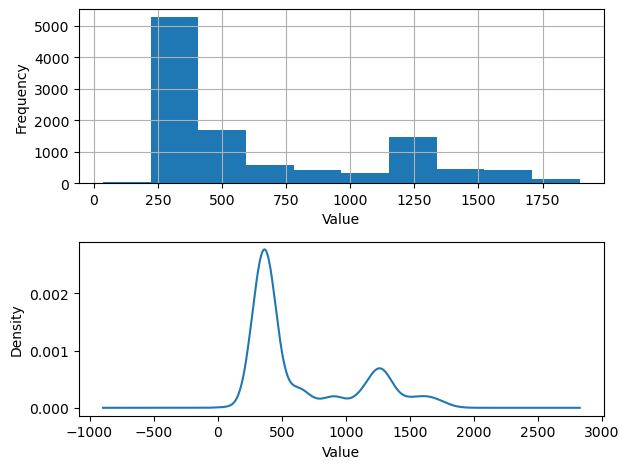

In [30]:
# Plots

# Plot
plt.figure(1)

# Histograma
plt.subplot(211)
df_serie.Value.hist()
plt.xlabel('Value')  # Definindo o rótulo do eixo x
plt.ylabel('Frequency')

# Densidade
plt.subplot(212)
df_serie.Value.plot(kind='kde')
plt.xlabel('Value')  # Definindo o rótulo do eixo x

# Ajustar o espaçamento entre os gráficos
plt.tight_layout()

plt.show()

**Análise & Insights:**    
- Não temos uma distribuição normal.
- Distribuição assimétrica à direita, com a maioria dos dados concentrados à esquerda.
- Transformações podem ser úteis antes da modelagem.

Text(0, 0.5, '\nValue')

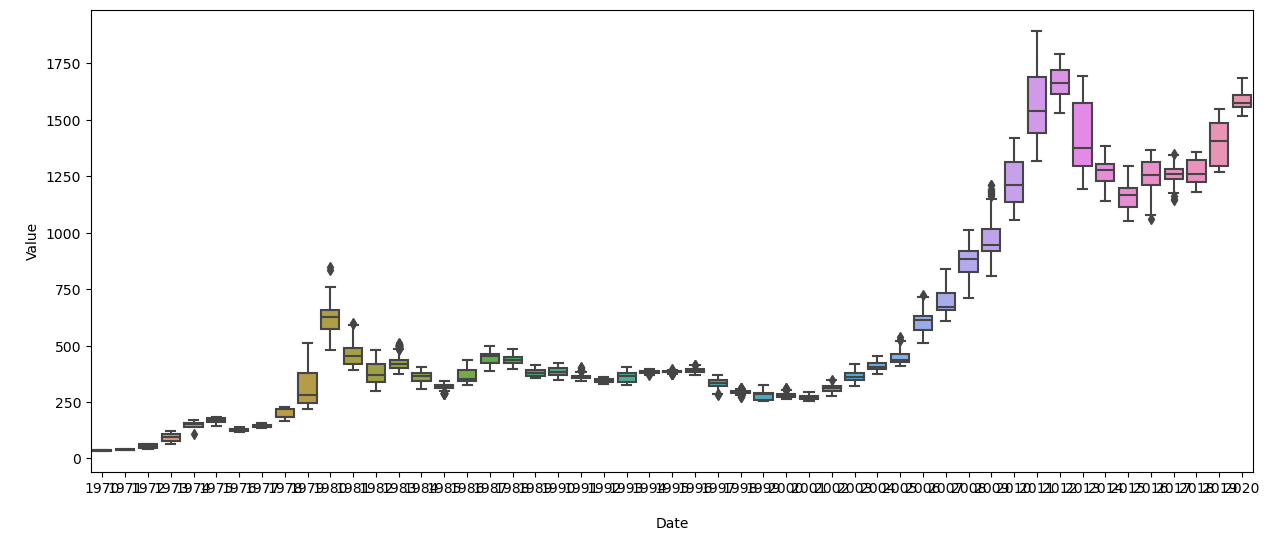

In [31]:
# Box Plot

# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis
indice_ano = df_serie.Value.index.year
valor = df_serie.Value

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = df_serie)

plt.xlabel("\nDate")
plt.ylabel("\nValue")

**Análise & Insights:**
- O aumento da mediana ao longo dos anos confirma uma tendência ascendente.
- Aumento constante da dispersão ao redor da mediana dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores,
o que pode explicar o aumento da sazonalidade identificada anteriormente.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

## Decomposição da Série Temporal

In [32]:
type(df_serie)

pandas.core.frame.DataFrame

In [33]:
# Decomposição Multiplicativa para dados diários
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(df_serie, 
                                                        model='multiplicative', 
                                                        extrapolate_trend='freq', 
                                                        period=365) 

In [34]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

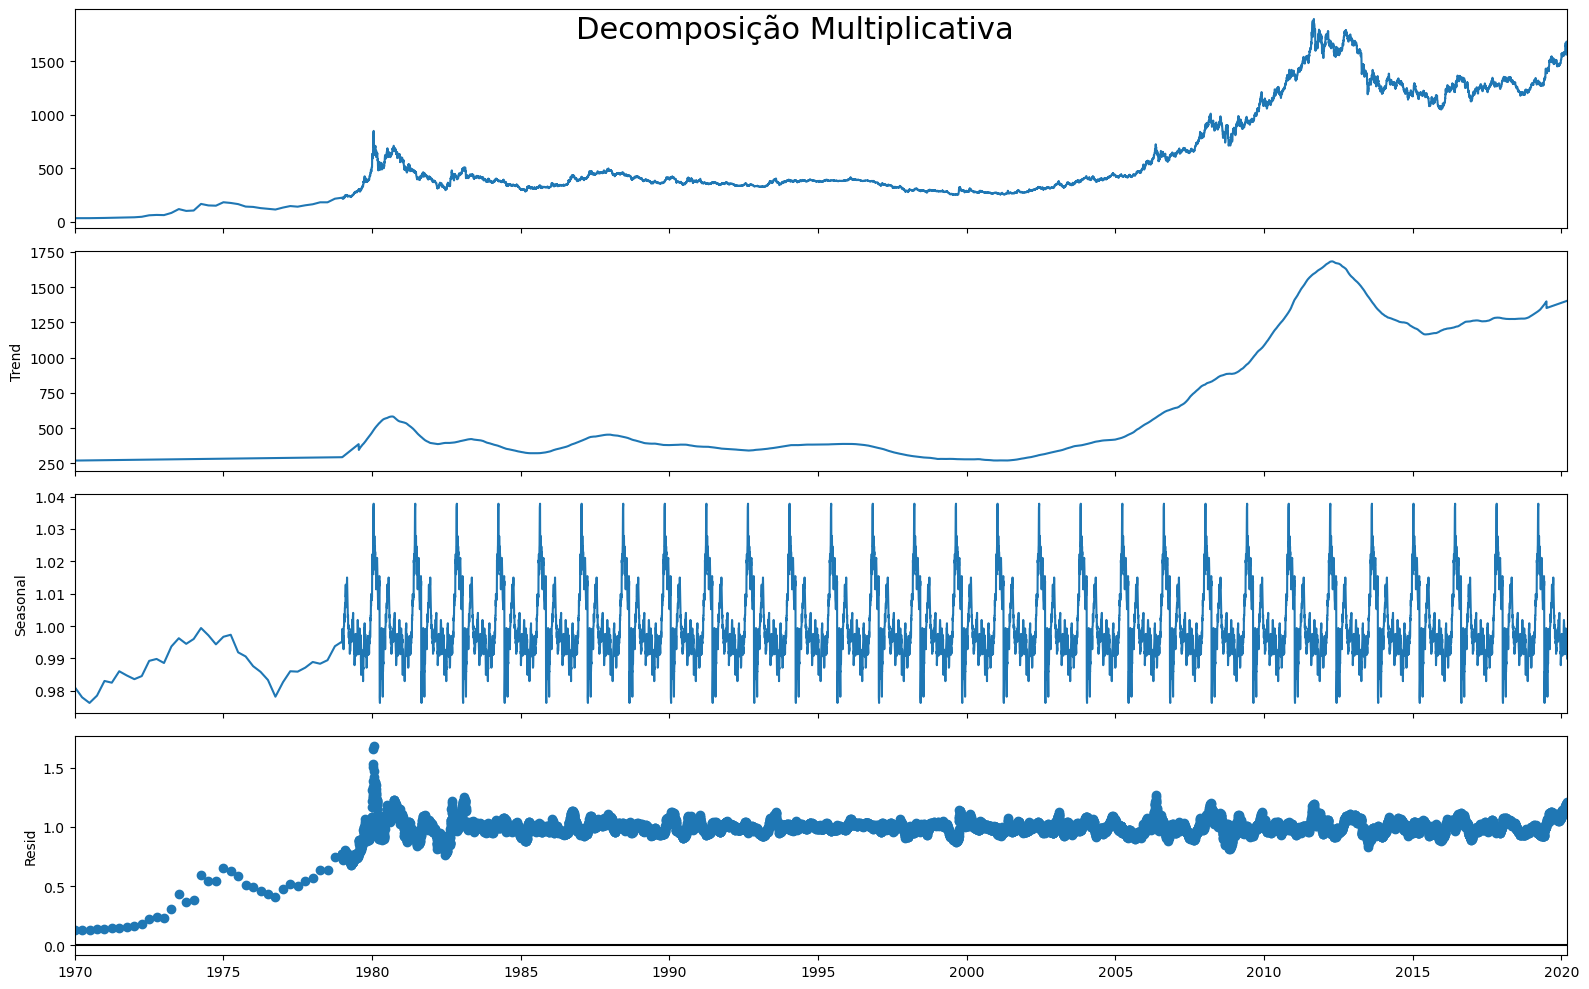

In [35]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

In [36]:
# Decomposição Aditiva
decomposicao_aditiva = sm.tsa.seasonal_decompose(df_serie, 
                                                        model='aditive', 
                                                        extrapolate_trend='freq', 
                                                        period=365) 

In [37]:
# Tipo do objeto
type(decomposicao_aditiva)

statsmodels.tsa.seasonal.DecomposeResult

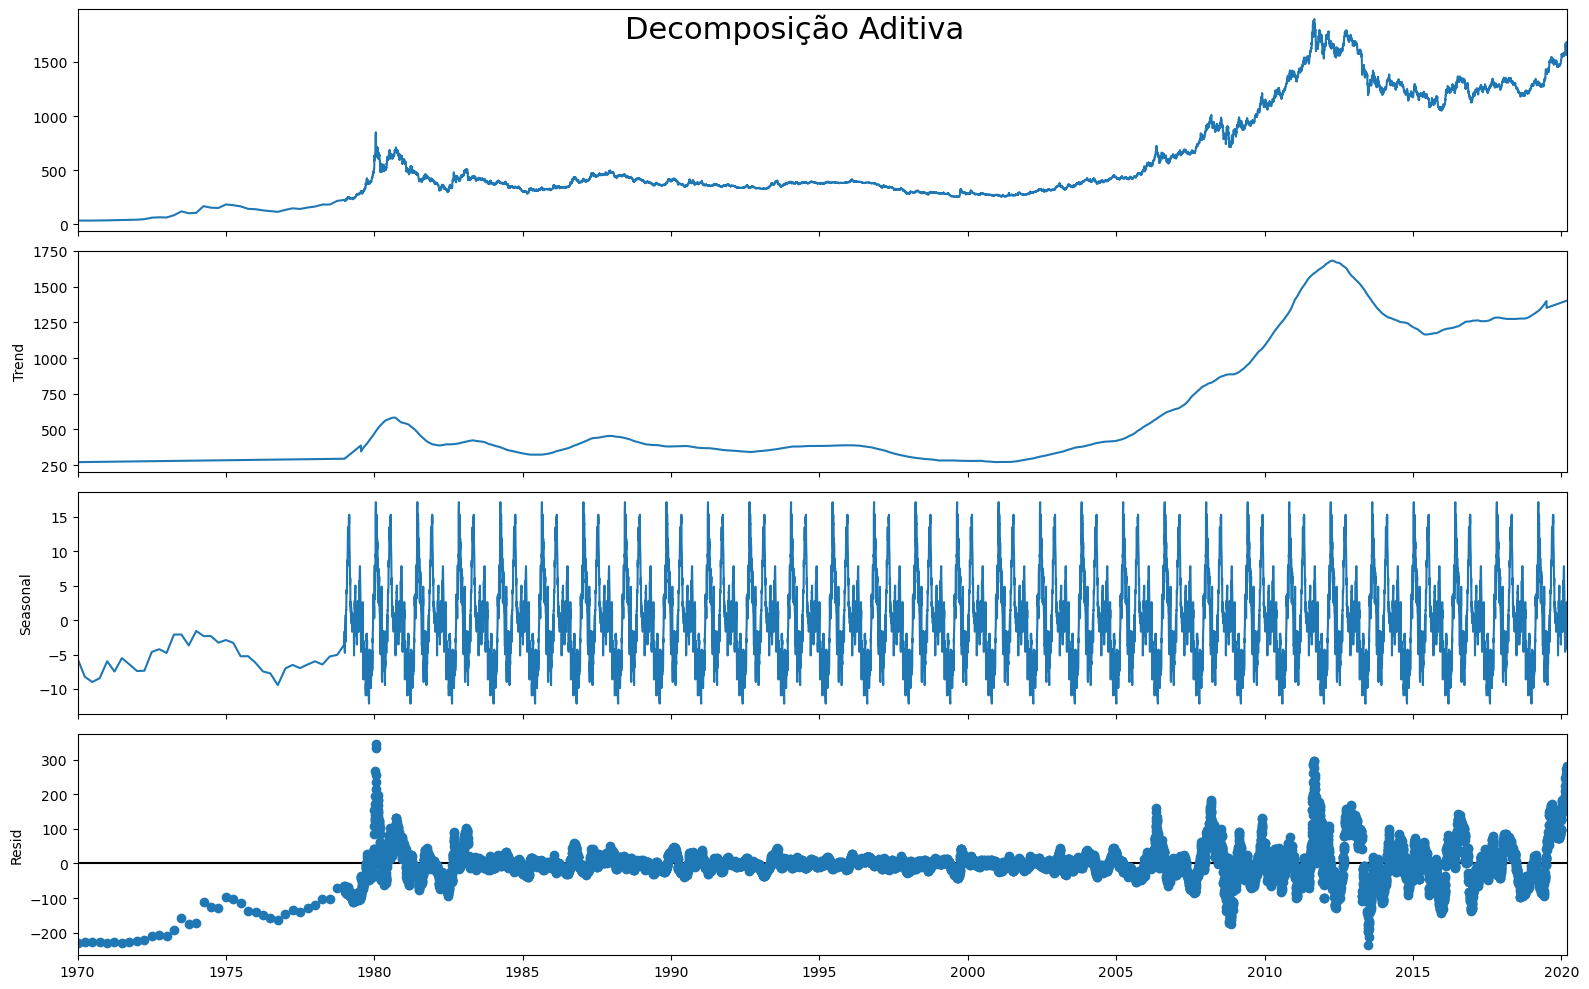

In [38]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

**Análise & Insigths:**
Na análise da decomposição da série temporal, observamos os seguintes pontos:

Tendência: O gráfico de tendência revela um aumento consistente na cotação do ouro ao longo do tempo, indicando uma valorização significativa.

Sazonalidade: O gráfico de sazonalidade mostra períodos regulares de aumento e queda nos preços do ouro. Esses momentos são caracterizados por flutuações, com valores máximos e mínimos bem definidos. Recomenda-se uma consulta com a área de negócios para compreender melhor a variabilidade identificada.

Resíduos: O gráfico de resíduos indica que a decomposição aditiva apresenta um padrão leve, enquanto a decomposição multiplicativa se revela mais aleatória. Isso sugere que a decomposição multiplicativa é mais adequada para essa série temporal específica.

Podemos extrair os valores da tendência, sazonalidade e resíduos da saída (decomposição multiplicada). Isso significa que esses componentes estão acessíveis individualmente e podem ser manipulados ou analisados separadamente.

## Extração dos Componentes da Série Temporal

O objetivo é reconstruir a série temporal original a partir dos componentes gerados pela decomposição multiplicativa (sazonalidade, tendência, resíduos e valores observados) e organizá-los em um único DataFrame.

In [39]:
# Concatena o resultado da decomposição da série
df_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

In [40]:
# Define o nome das colunas
df_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [41]:
# Mostra o resultado
df_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
Date,,,,
1970-01-01,0.981129,270.764495,0.132503,35.2
1970-04-01,0.978002,271.407658,0.132235,35.1
1970-07-01,0.976265,272.050822,0.133286,35.4
1970-10-01,0.978522,272.693985,0.135663,36.2
1971-01-01,0.983053,273.337149,0.139186,37.4


In [42]:
# Dados originais
df_serie.head()

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


In [43]:
df_serie.sample(5)

,Value
Date,
2006-02-08,548.75
2018-01-02,1312.05
2017-02-06,1226.75
1998-03-09,293.85
1986-04-09,337.85


**CONCLUSÃO/RESUMO:**
Na primeira fase do projeto, observamos que o dataset não segue uma distribuição normal, mas sim apresenta uma assimetria à direita. A série temporal analisada demonstra um aumento tanto na sazonalidade quanto na tendência ascendente. A decomposição aditiva mostrou que os resíduos possuem um padrão leve, enquanto a decomposição multiplicativa apresentou uma maior aleatoriedade. Isso sugere que a decomposição multiplicativa seja mais adequada para essa série temporal específica.

Por fim, organizamos a reconstrução da série temporal original em um dataframe, utilizando os componentes gerados pela decomposição multiplicativa: sazonalidade, tendência, resíduos e os valores observados.


**SOBRE O PROJETO:**
Terminada essa primeira parte do projeto, vamos continuar a execução da segunda fase.

### FIM DA PARTE I DO PROJETO